# Initialization

### 1. Import libraries

In [2]:
%matplotlib inline
import Quandl
import pandas as pd
from backports import configparser

### 2. Initialize the benchmark and stock list

In [60]:
config = configparser.ConfigParser()
config.read("HkexStockPicker.ini")

bm_file_path = config['DEFAULT']['BenchmarkFilePath']
stocks_file_path = config['DEFAULT']['StocksFilePath']

bm_list = [x.strip() for x in open(bm_file_path).readlines()]
stocks_list =  [x.strip() for x in open(stocks_file_path).readlines()]

token = config['DEFAULT']['QuandlToken']
num_of_days = int(config['DEFAULT']['NumOfDays'])
num_of_pool = int(config['DEFAULT']['NumOfPool'])

# Retrieve data

Initialize a dataframe for all the instrument returns.

In [50]:
returns = pd.DataFrame()

Get all the benchmark returns.

In [53]:
for b in bm_list:
    returns[b] = Quandl.get(b, rows=num_of_days, authtoken=token)["Close"].pct_change()

Get all the stock returns

In [ ]:
for s in stocks_list:
    returns[s] = Quandl.get(s, rows=num_of_days, authtoken=token)["Close"].pct_change()

After getting the returns, fill all the nan values to zero, assuming no change in return in non-trading days.

In [57]:
returns = returns.fillna(0)

# Data analysis

In [58]:
benchmark = bm_list[0]

Get the best performance stocks from the return

In [66]:
best_candidate = (returns.sum() - returns[benchmark].sum()).sort_values(ascending=False)
best_candidate = best_candidate.head(num_of_pool).index.values
best_candidate

array(['YAHOO/HK_1928', 'YAHOO/HK_0027', 'YAHOO/HK_0883', 'YAHOO/HK_0857',
       'YAHOO/HK_0358'], dtype=object)

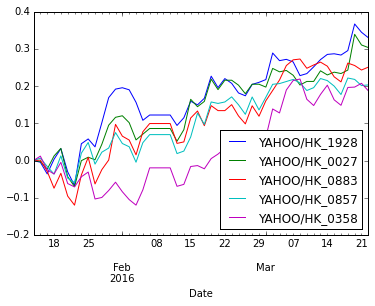

In [69]:
returns[best_candidate].cumsum().plot()